In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from surprise import Dataset
from surprise import Reader
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import accuracy
from surprise.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
movieData = pd.read_csv('ml-latest-small/ratings.csv')

In [3]:
users = movieData['userId'].values
movies = movieData['movieId'].values
ratings = movieData['rating'].values

### Q1

In [4]:
print(len(ratings) / (len(set(movies)) * len(set(users))))

0.016999683055613623


### Q2

No handles with labels found to put in legend.


5.0


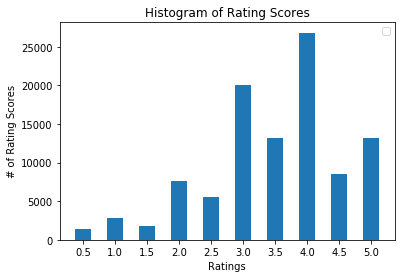

In [5]:
print(max(ratings))
labels = np.unique(ratings)

fig, ax = plt.subplots()
ax.bar(np.arange(len(labels)), np.unique(ratings, return_counts = True)[1], 0.5)

ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.legend()

plt.title("Histogram of Rating Scores")
plt.xlabel("Ratings")
plt.ylabel("# of Rating Scores")

plt.show()

### Q3

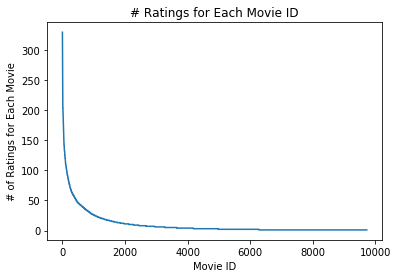

In [6]:
get = np.unique(movies, return_counts = True)

plt.plot(range(len(get[0])), -np.sort(-get[1]))
plt.title('# Ratings for Each Movie ID')
plt.xlabel('Movie ID')
plt.ylabel('# of Ratings for Each Movie')
plt.show()

### Q4

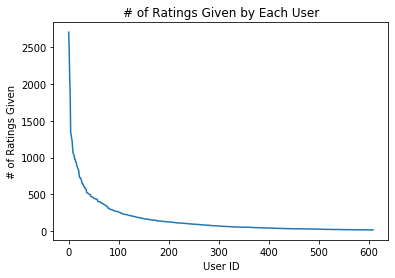

In [7]:
get = np.unique(users, return_counts = True)

plt.plot(range(len(get[0])), -np.sort(-get[1]))
plt.title('# of Ratings Given by Each User')
plt.xlabel('User ID')
plt.ylabel('# of Ratings Given')
plt.show()

### Q6

No handles with labels found to put in legend.


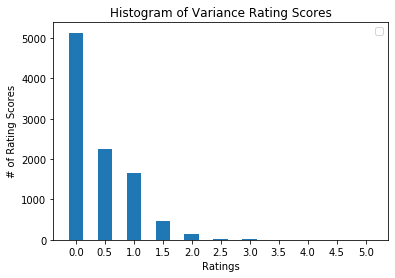

In [8]:
variance = np.var(movieData.pivot_table('rating','userId','movieId'), axis = 0)
variance = round(variance * 2)/2

labels = np.unique(variance)

fig, ax = plt.subplots()
ax.bar(np.arange(len(labels)), np.unique(variance, return_counts = True)[1], 0.5)

ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.legend()

plt.title("Histogram of Variance Rating Scores")
plt.xlabel("Ratings")
plt.ylabel("# of Rating Scores")

plt.show()

### Q10

In [9]:
reader = Reader(line_format = 'user item rating timestamp', sep = ',', rating_scale = (0.5, 5), skip_lines=1)
movieDataset = Dataset.load_from_file('ml-latest-small/ratings.csv', reader = reader)

rmse = []
mae = []

for i in range(2,102,2):
    knnModel = KNNWithMeans(k = i, sim_options = {'name': 'pearson', 'user_based': True}, verbose = False)
    cv = cross_validate(knnModel, movieDataset, measures = ['RMSE','MAE'], cv = 10, verbose = False)
    rmse.append(np.mean(cv['test_rmse']))
    mae.append(np.mean(cv['test_mae']))
    print('Finished k value: ', i)

Finished k value:  2
Finished k value:  4
Finished k value:  6
Finished k value:  8
Finished k value:  10
Finished k value:  12
Finished k value:  14
Finished k value:  16
Finished k value:  18
Finished k value:  20
Finished k value:  22
Finished k value:  24
Finished k value:  26
Finished k value:  28
Finished k value:  30
Finished k value:  32
Finished k value:  34
Finished k value:  36
Finished k value:  38
Finished k value:  40
Finished k value:  42
Finished k value:  44
Finished k value:  46
Finished k value:  48
Finished k value:  50
Finished k value:  52
Finished k value:  54
Finished k value:  56
Finished k value:  58
Finished k value:  60
Finished k value:  62
Finished k value:  64
Finished k value:  66
Finished k value:  68
Finished k value:  70
Finished k value:  72
Finished k value:  74
Finished k value:  76
Finished k value:  78
Finished k value:  80
Finished k value:  82
Finished k value:  84
Finished k value:  86
Finished k value:  88
Finished k value:  90
Finished k val

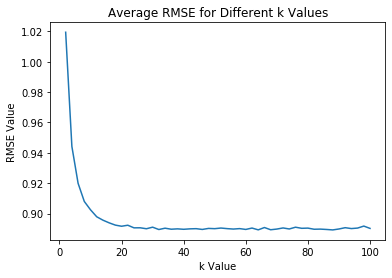

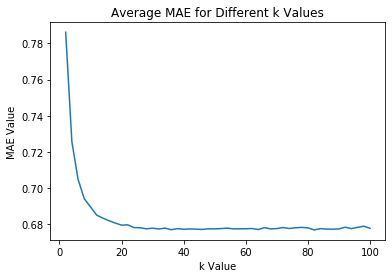

In [10]:
kVals = range(2,102,2)

plt.plot(kVals, rmse)
plt.title('Average RMSE for Different k Values')
plt.xlabel('k Value')
plt.ylabel('RMSE Value')
plt.show()

plt.plot(kVals, mae)
plt.title('Average MAE for Different k Values')
plt.xlabel('k Value')
plt.ylabel('MAE Value')
plt.show()

### Q11

In [11]:
bestK = 0
for k in range(0,len(rmse)-1):
    if(rmse[k+1] < rmse[k]):
        bestK += 2
    else:
        print("Minimum k: ", bestK)
        print("Average RMSE at minimum k: ", rmse[k])
        print("Average MAE at minimum k: ", rmse[k])
        break

Minimum k:  18
Average RMSE at minimum k:  0.891604915447622
Average MAE at minimum k:  0.891604915447622


### Q12

In [12]:
kf = KFold(n_splits = 10)
overallRMSE = [] 

for i in range(2,102,2):
    knnModel = KNNWithMeans(k = i, sim_options = {'name': 'pearson', 'user_based': True}, verbose = False)
    rmse = []
    for trainData, testData in kf.split(movieDataset):
        movieIds = []
        trimTestData = []
        
        for tupleVal in testData:
            movieIds.append(tupleVal[1])
            
        get = np.unique(movieIds, return_counts = True)
        
        for tupleVal in testData:
            if(get[1][np.where(get[0] == tupleVal[1])[0][0]] > 2):
                trimTestData.append(tupleVal)
        
        knnModel.fit(trainData)
        predictions = knnModel.test(trimTestData)
        rmse.append(accuracy.rmse(predictions, verbose=False))
        
    overallRMSE.append(np.mean(rmse))
    print('Finished k value: ', i)

Finished k value:  2
Finished k value:  4
Finished k value:  6
Finished k value:  8
Finished k value:  10
Finished k value:  12
Finished k value:  14
Finished k value:  16
Finished k value:  18
Finished k value:  20
Finished k value:  22
Finished k value:  24
Finished k value:  26
Finished k value:  28
Finished k value:  30
Finished k value:  32
Finished k value:  34
Finished k value:  36
Finished k value:  38
Finished k value:  40
Finished k value:  42
Finished k value:  44
Finished k value:  46
Finished k value:  48
Finished k value:  50
Finished k value:  52
Finished k value:  54
Finished k value:  56
Finished k value:  58
Finished k value:  60
Finished k value:  62
Finished k value:  64
Finished k value:  66
Finished k value:  68
Finished k value:  70
Finished k value:  72
Finished k value:  74
Finished k value:  76
Finished k value:  78
Finished k value:  80
Finished k value:  82
Finished k value:  84
Finished k value:  86
Finished k value:  88
Finished k value:  90
Finished k val

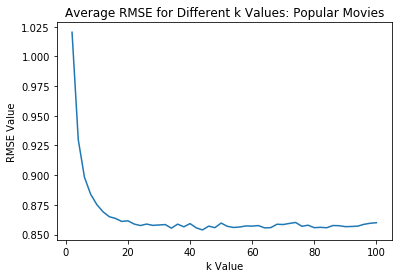

0.8539042262217093


In [13]:
plt.plot(kVals, overallRMSE)
plt.title('Average RMSE for Different k Values: Popular Movies')
plt.xlabel('k Value')
plt.ylabel('RMSE Value')
plt.show()

print(min(overallRMSE))

### Q13

In [14]:
kf = KFold(n_splits = 10)
overallRMSE = [] 

for i in range(2,102,2):
    knnModel = KNNWithMeans(k = i, sim_options = {'name': 'pearson', 'user_based': True}, verbose = False)
    rmse = []
    for trainData, testData in kf.split(movieDataset):
        movieIds = []
        trimTestData = []
        
        for tupleVal in testData:
            movieIds.append(tupleVal[1])
            
        get = np.unique(movieIds, return_counts = True)
        
        for tupleVal in testData:
            if(get[1][np.where(get[0] == tupleVal[1])[0][0]] <= 2):
                trimTestData.append(tupleVal)
        
        knnModel.fit(trainData)
        predictions = knnModel.test(trimTestData)
        rmse.append(accuracy.rmse(predictions, verbose=False))
        
    overallRMSE.append(np.mean(rmse))
    print('Finished k value: ', i)

Finished k value:  2
Finished k value:  4
Finished k value:  6
Finished k value:  8
Finished k value:  10
Finished k value:  12
Finished k value:  14
Finished k value:  16
Finished k value:  18
Finished k value:  20
Finished k value:  22
Finished k value:  24
Finished k value:  26
Finished k value:  28
Finished k value:  30
Finished k value:  32
Finished k value:  34
Finished k value:  36
Finished k value:  38
Finished k value:  40
Finished k value:  42
Finished k value:  44
Finished k value:  46
Finished k value:  48
Finished k value:  50
Finished k value:  52
Finished k value:  54
Finished k value:  56
Finished k value:  58
Finished k value:  60
Finished k value:  62
Finished k value:  64
Finished k value:  66
Finished k value:  68
Finished k value:  70
Finished k value:  72
Finished k value:  74
Finished k value:  76
Finished k value:  78
Finished k value:  80
Finished k value:  82
Finished k value:  84
Finished k value:  86
Finished k value:  88
Finished k value:  90
Finished k val

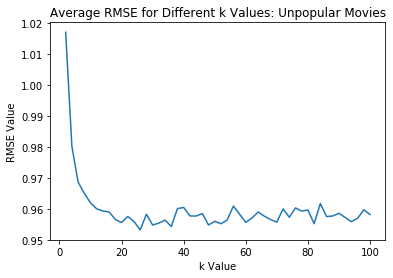

0.9531859470657424


In [15]:
plt.plot(kVals, overallRMSE)
plt.title('Average RMSE for Different k Values: Unpopular Movies')
plt.xlabel('k Value')
plt.ylabel('RMSE Value')
plt.show()

print(min(overallRMSE))

### Q14

In [16]:
kf = KFold(n_splits = 10)
overallRMSE = [] 

for i in range(2,102,2):
    knnModel = KNNWithMeans(k = i, sim_options = {'name': 'pearson', 'user_based': True}, verbose = False)
    rmse = []
    for trainData, testData in kf.split(movieDataset):
        movieIds = []
        trimTestData = []
        variances = []
        
        for tupleVal in testData:
            movieIds.append(tupleVal[1])
            
        get = np.unique(movieIds, return_counts = True)
        
        for id in movieIds:
            getRatings = []
            for tupleVal in testData:
                if(tupleVal[1] == id):
                    getRatings.append(tupleVal[2])
            variances.append(np.var(getRatings))
        
        for tupleVal in testData:
            if(get[1][np.where(get[0] == tupleVal[1])[0][0]] >= 5 and variances[np.where(get[0] == tupleVal[1])[0][0]] >= 2):
                trimTestData.append(tupleVal)
        
        knnModel.fit(trainData)
        predictions = knnModel.test(trimTestData)
        rmse.append(accuracy.rmse(predictions, verbose=False))
        
    overallRMSE.append(np.mean(rmse))
    print('Finished k value: ', i)

Finished k value:  2
Finished k value:  4
Finished k value:  6
Finished k value:  8
Finished k value:  10
Finished k value:  12
Finished k value:  14
Finished k value:  16
Finished k value:  18
Finished k value:  20
Finished k value:  22
Finished k value:  24
Finished k value:  26
Finished k value:  28
Finished k value:  30
Finished k value:  32
Finished k value:  34
Finished k value:  36
Finished k value:  38
Finished k value:  40
Finished k value:  42
Finished k value:  44
Finished k value:  46
Finished k value:  48
Finished k value:  50
Finished k value:  52
Finished k value:  54
Finished k value:  56
Finished k value:  58
Finished k value:  60
Finished k value:  62
Finished k value:  64
Finished k value:  66
Finished k value:  68
Finished k value:  70
Finished k value:  72
Finished k value:  74
Finished k value:  76
Finished k value:  78
Finished k value:  80
Finished k value:  82
Finished k value:  84
Finished k value:  86
Finished k value:  88
Finished k value:  90
Finished k val

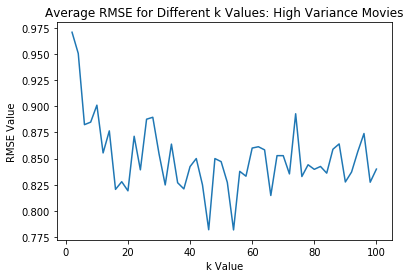

0.7817946599146941


In [17]:
plt.plot(kVals, overallRMSE)
plt.title('Average RMSE for Different k Values: High Variance Movies')
plt.xlabel('k Value')
plt.ylabel('RMSE Value')
plt.show()

print(min(overallRMSE))

### Q15

In [18]:
ratingThresholds = [2.5,3,3.5,4]
fprs = []
tprs = []
aucs = []

knnModel = KNNWithMeans(k = bestK, sim_options = {'name': 'pearson', 'user_based': True}, verbose = False)
trainData, testData = train_test_split(movieDataset)
knnModel.fit(trainData)
predictions = knnModel.test(testData)
  
for threshold in ratingThresholds:
    binaryEstimate = []
    estimate = []
    
    for i in range(len(predictions)):
        estimate.append(predictions[i].est)
        if testData[i][2] >= threshold:
            binaryEstimate.append(1)
        else:
            binaryEstimate.append(0)
            
    fpr, tpr, _ = roc_curve(binaryEstimate, estimate)
    auc = roc_auc_score(binaryEstimate, estimate)
    
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(auc)
    
    print("finished for rating threshold: ", threshold)

finished for rating threshold:  2.5
finished for rating threshold:  3
finished for rating threshold:  3.5
finished for rating threshold:  4


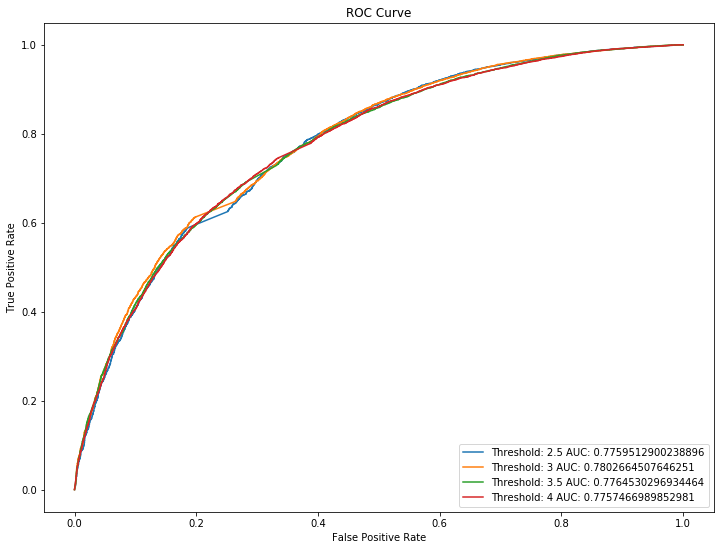

In [19]:
plt.figure(figsize=(12,9))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
for i in range(len(fprs)):
    plt.plot(fprs[i], tprs[i], label = 'Threshold: {rate} AUC: {auc}'.format(rate=ratingThresholds[i], auc=aucs[i]) )
plt.legend(loc="lower right")
plt.show()